<a href="https://colab.research.google.com/github/teja-ana/demo/blob/master/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This project involves
#Data collection: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling/activity
#Data Preprocessing
#Model building 
#Model Evaluation

In [1]:
!pip install -q keras
import keras

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Churn_bank_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
df.drop('RowNumber',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)
#df.drop('',axis='columns',inplace=True)


In [21]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [25]:
df.shape

(10000, 11)

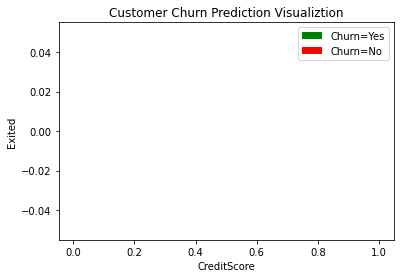

In [32]:
credit_Exited_no = df[df.Exited=='0'].CreditScore          
credit_Exited_yes = df[df.Exited=='1'].CreditScore          
plt.xlabel("CreditScore")
plt.ylabel("Exited")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([credit_Exited_no, credit_Exited_yes], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

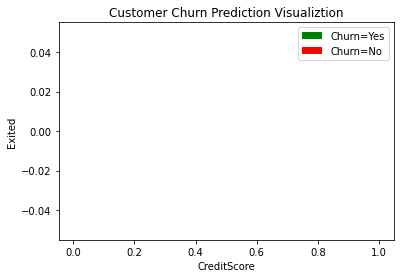

In [33]:
credit_Exited_no = df[df.Exited=='0'].HasCrCard                    
credit_Exited_yes = df[df.Exited=='1'].HasCrCard                      
plt.xlabel("CreditScore")
plt.ylabel("Exited")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([credit_Exited_no, credit_Exited_yes], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
#One hot encoding for categorical columns

In [34]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [36]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [38]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [39]:
df.Gender.unique()

array([1, 0])

In [40]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [43]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [44]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8734,706,1,47,10,144090.42,1,1,0,140938.95,1,0,1,0
7494,795,1,36,1,151844.64,1,1,1,135388.89,0,1,0,0
9245,681,1,41,0,120549.29,2,1,0,175722.31,0,1,0,0
4752,659,0,54,8,133436.52,1,1,0,56787.80,0,1,0,0
5692,573,1,30,6,0.00,2,1,0,66190.21,0,1,0,0
4267,711,1,41,3,145754.91,1,1,1,101455.07,0,1,0,0
6645,850,0,37,4,126872.60,1,1,0,197266.58,0,1,0,0
3052,607,0,35,2,0.00,2,1,1,114190.30,0,1,0,0
5355,597,1,29,1,132144.35,1,1,0,158086.33,0,1,0,0
7246,485,0,37,5,0.00,2,0,1,170226.47,0,1,0,0


In [50]:
# Scaling
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [51]:
df1.sample(100)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9334,0.582,0,0.094595,1.0,0.000000,0.333333,1,1,0.904070,0,0,0,1
1869,0.604,0,0.202703,0.7,0.510709,0.000000,1,0,0.792206,0,0,1,0
9195,0.358,0,0.148649,0.4,0.541094,0.000000,0,0,0.564065,1,0,1,0
4190,1.000,1,0.175676,0.3,0.483215,0.000000,1,1,0.155070,0,0,0,1
9500,0.778,1,0.121622,0.8,0.394289,0.000000,1,1,0.534843,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,0.828,0,0.135135,1.0,0.494317,0.000000,1,0,0.830963,0,0,1,0
4118,0.358,0,0.135135,0.9,0.000000,0.333333,1,1,0.262693,0,1,0,0
6537,0.342,1,0.283784,0.3,0.583538,0.000000,0,0,0.364945,0,0,0,1
6640,0.662,0,0.243243,0.5,0.565776,0.000000,1,1,0.925751,0,1,0,0


In [52]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [55]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [56]:
X_train.shape

(8000, 12)

In [57]:
X_test.shape

(2000, 12)

In [58]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [59]:
len(X_train.columns)

12

In [61]:
#Build a model (ANN) in tensorflow/keras
import tensorflow

In [63]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 890us/step - loss: 0.5192 - accuracy: 0.7830
Epoch 2/100
250/250 [==============================] - 0s 946us/step - loss: 0.4696 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 911us/step - loss: 0.4564 - accuracy: 0.8048
Epoch 4/100
250/250 [==============================] - 0s 918us/step - loss: 0.4474 - accuracy: 0.8096
Epoch 5/100
250/250 [==============================] - 0s 896us/step - loss: 0.4401 - accuracy: 0.8120
Epoch 6/100
250/250 [==============================] - 0s 930us/step - loss: 0.4353 - accuracy: 0.8112
Epoch 7/100
250/250 [==============================] - 0s 917us/step - loss: 0.4316 - accuracy: 0.8131
Epoch 8/100
250/250 [==============================] - 0s 881us/step - loss: 0.4296 - accuracy: 0.8134
Epoch 9/100
250/250 [==============================] - 0s 897us/step - loss: 0.4276 - accuracy: 0.8119
Epoch 10/100
250/250 [==============================] - 0s 904us/step - l

In [64]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 709us/step - loss: 0.3489 - accuracy: 0.8560


[0.3488742411136627, 0.8560000061988831]

In [65]:
yp = model.predict(X_test)
yp[:5]

array([[0.03274593],
       [0.0786202 ],
       [0.07301536],
       [0.08212459],
       [0.08758688]], dtype=float32)

In [66]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [67]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [68]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [ ]:
#Model Evaluation

In [69]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1595
           1       0.76      0.42      0.54       405

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Text(69.0, 0.5, 'Truth')

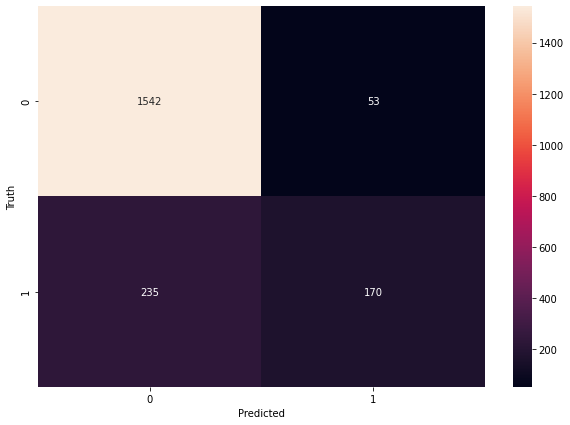

In [70]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
#Model Evaluation
#ACCURACY of the model
round((1542+2170)/(1542+2170+53+235),2)# accuracy

0.93

In [75]:
#Precision for 0 class. i.e. Precision for customers who did NOT EXITED

In [72]:
round(1542/(1542+235),2) 

0.87

In [ ]:
#Precision for 1 class. i.e. Precision for customers who actually EXITED

In [73]:
round(170/(170+35),2)

0.83

In [ ]:
#Recall for 0 class
